In [1]:
!pip install eli5 shap

     |████████████████████████████████| 106 kB 3.1 MB/s 
     |████████████████████████████████| 564 kB 18.5 MB/s 


In [11]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Support Vector Machine
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC # 회귀 모형, 분류 모형

#평가
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report

# 교차검증
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, train_test_split

# Feauter Selection
from sklearn.feature_selection import RFE, RFECV

# 시각화(SVM은 회귀계수가 나오지 않습니다.)
import eli5
from eli5.sklearn import PermutationImportance
import shap

In [ ]:
def contours2D(model, x1, x2, h=0.01, **params):
  xx1, xx2 = np.meshgrid(
    np.arange(x1.min() - 0.1, x1.max() + 0.1, h), 
    np.arange(x2.min() - 0.1 , x2.max() + 0.1 , h)
  )

  y = model.predict(np.c_[xx1.flatten(), xx2.flatten()])
  y = y.reshape(xx1.shape)
  result = plt.contourf(xx1, xx2, y, **params)
  return result

# SVC (Support Vector Classification)
- 마진을 최대로 하는 서포트 라인 찾기

## SVM - Linear

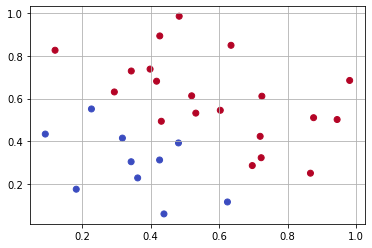

In [ ]:
np.random.seed(123)
x = np.random.rand(30,2)
y = np.zeros(len(x))
y[-4/5 + 3/4 * x[:,0] + 1 * x[:,1] > 0] = 1

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

In [ ]:
model = LogisticRegression(penalty='none').fit(x, y) 

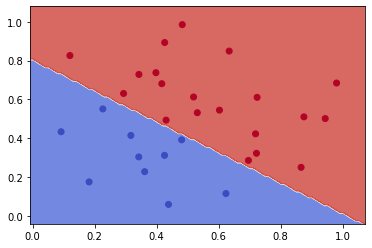

In [ ]:
x1, x2 = x[:,0], x[:, 1]
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.show()

- 파라미터
 - c : 마진 내에 허용될 오분류
 - kernel : 커널에 따라 모양이 달라짐, linear, poly,rbf(default)

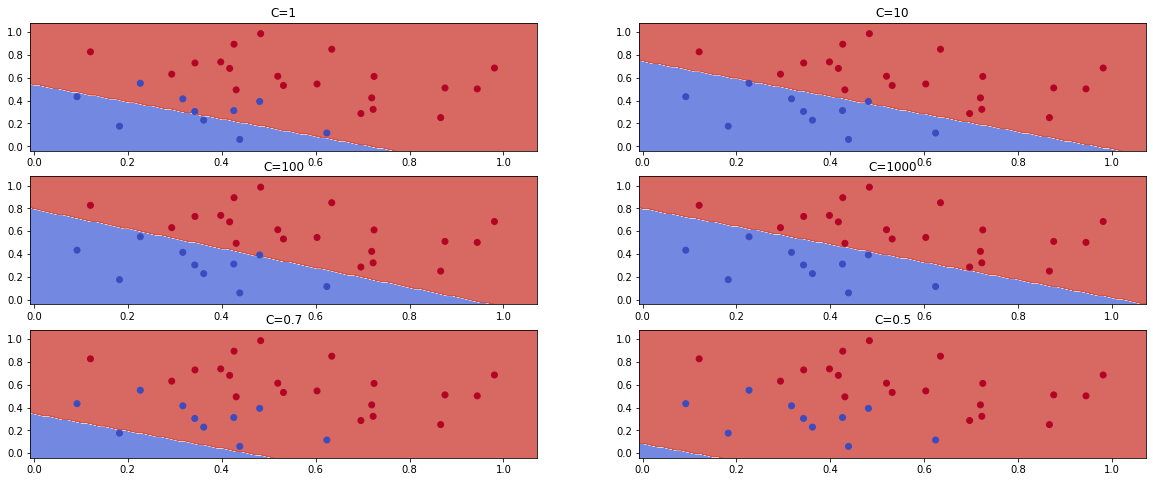

In [ ]:
# linear, 슬랙=1 일 때의 모형
# C에 따른 모형 확인

plt.figure(figsize=(20,8))

plt.subplot(3,2,1)
model = SVC(kernel='linear',C=1).fit(x,y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=1')

plt.subplot(3,2,2)
model = SVC(kernel='linear',C=10).fit(x,y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=10')

plt.subplot(3,2,3)
model = SVC(kernel='linear',C=100).fit(x,y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=100')

plt.subplot(3,2,4)
model = SVC(kernel='linear',C=1000).fit(x,y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=1000')

plt.subplot(3,2,5)
model = SVC(kernel='linear',C=0.7).fit(x,y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=0.7')

plt.subplot(3,2,6)
model = SVC(kernel='linear',C=0.5).fit(x,y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=0.5')

plt.show()

- C는 결정 경계를 정하는 파라미터
- C의 값이 클 수록 오버핏 되는 경향 = 마진 내에 오분류를 허용하지 않음
- C가 작아지면 언더핏 되는 경향 = 마진 내에 오분류를 허용하는 확률이 커짐
- C 파라미터를 이용해 적당한 모델을 만들어야 함

## SVM -Poly
- 커널에 따라 바뀜

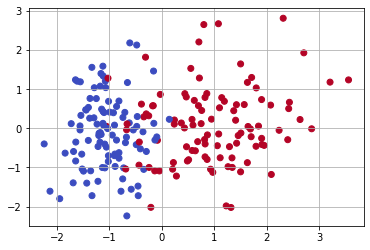

In [ ]:
x, y = datasets.make_classification(
  n_samples=200, n_features=2, n_classes=2, random_state=20220214,
  n_informative=1, n_redundant=0, n_clusters_per_class=1,
)

x1, x2 = x[:, 0], x[:, 1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

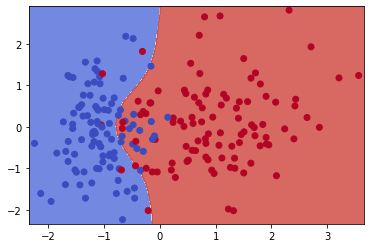

In [ ]:
model = SVC(kernel='poly',C=1).fit(x,y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')


## SVN - Gaussian Kernel (rbf)
- 비선형 모델을 찾기 위해 저차원의 자료를 고차원으로 변경
- 샘플에서는 2차원을 3차원으로 변경
- 가장 많이 쓰임, 성능이 제일 좋음

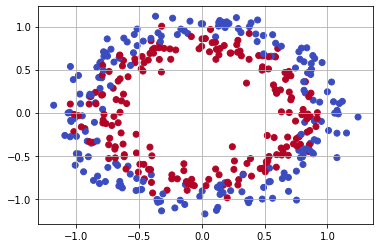

In [ ]:
x, y = datasets.make_circles(n_samples=400, noise=0.1, random_state=410)
x1, x2 = x[:, 0], x[:, 1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

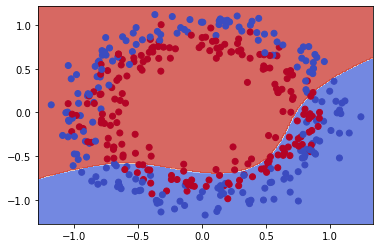

In [ ]:
model = SVC(kernel='poly',C=1000).fit(x,y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
# poly로는 분석할 수 없음! 

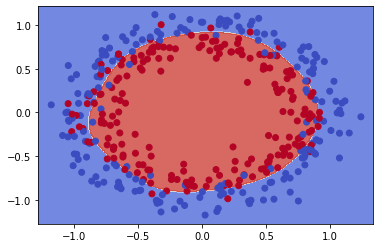

In [ ]:
model = SVC(kernel='rbf',C=100).fit(x,y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')

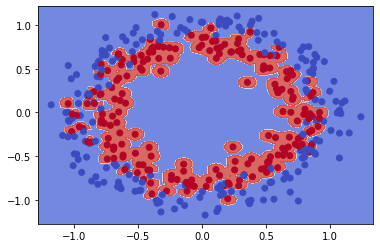

In [ ]:
model = SVC(kernel='rbf',C=10, gamma=1000).fit(x,y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')

- 감마는 곡률 경계를 결정하는 파라미터
- 감마가 작으면 곡률의 범위가 커지고 과소적합
- 감마가 크면 곡률의 범위가 작아지고 자료를 완벽하게 분류하려고 하여 과적합이 발생할 수 있음

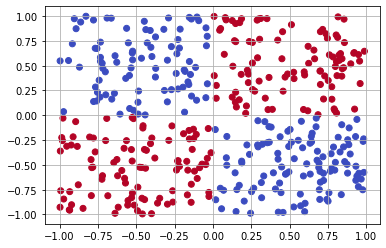

In [ ]:
np.random.seed(410)
x = np.random.uniform(-1,1, (400,2))
y = np.zeros((400), dtype=np.int32)
y[ x[:,0] * x[:,1] > 0] = 1

x1, x2 = x[:, 0], x[:, 1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

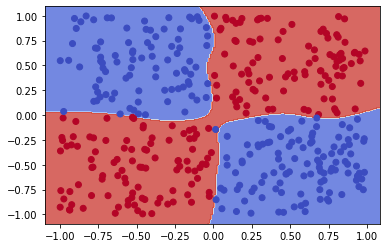

In [ ]:
model = SVC(kernel='rbf', C=10, gamma=10).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')

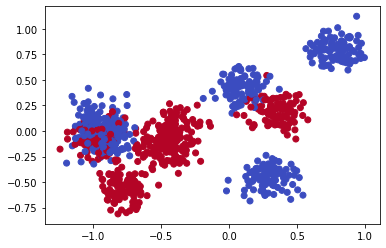

In [ ]:
x, y = datasets.make_blobs( 
  n_samples=1000, center_box=(-1, 1), centers=10, cluster_std=0.1, random_state=3)
y %= 2

x1, x2 = x[:, 0], x[:, 1]
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='coolwarm')

SVM은 딥러닝(nn)과 비교해도 결과가 잘 나옴을 알 수 있음

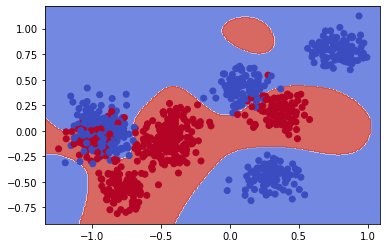

In [ ]:
model = SVC(kernel='rbf', C=10, gamma=10).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')

# Kaggle 예시

In [ ]:
!pwd

/home/lab13


In [ ]:
kaggle_json_path = '/home/lab13/kaggle.json'

! mkdir -p ~/.kaggle
! cp '{kaggle_json_path}' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
%cd '/home/lab13/data/dont_overfit/'

/home/lab13/data/dont_overfit


In [ ]:
# 캐글 설치
! pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 KB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 KB 20.0 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=32de8e257cad22e4939827dbaec34608f447eeb87e057dabe18e5a61bf25ae73
  Stored in directory: /home/lab13/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [ ]:
! kaggle competitions download -c dont-overfit-ii

  0%|                                               | 0.00/12.7M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 12.7M/12.7M [00:00<00:00, 234MB/s]


In [ ]:
!ls

dont-overfit-ii.zip


In [ ]:
! unzip dont-overfit-ii.zip

Archive:  dont-overfit-ii.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train=pd.read_csv('/home/lab13/data/dont_overfit/train.csv')
train.head(2)

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343


In [ ]:
test=pd.read_csv('/home/lab13/data/dont_overfit/test.csv')
test

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,...,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
1,251,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,...,1.297,1.114,0.657,0.760,0.899,-1.612,-1.701,1.107,-0.314,-0.641
2,252,1.119,1.036,1.220,1.518,0.265,-0.088,0.245,-0.533,-0.921,...,-0.864,-0.736,0.367,0.154,0.830,-1.352,0.914,0.377,0.588,-0.912
3,253,-0.933,0.212,-0.053,0.570,-1.540,-1.108,0.462,1.022,-0.215,...,0.063,-0.958,0.762,-0.213,-2.171,0.830,1.435,0.125,2.782,0.619
4,254,-0.208,-0.556,2.641,0.853,-0.384,0.312,0.514,0.481,-1.929,...,-0.689,0.213,0.568,-0.935,-0.015,0.267,0.739,1.340,-0.178,1.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19745,19995,0.630,-0.244,-1.175,0.948,1.254,-1.297,-1.317,1.470,-1.958,...,-1.171,0.902,-0.006,-0.893,0.238,1.157,0.895,-1.760,-2.381,0.901
19746,19996,-0.963,0.573,-0.482,-0.519,-0.433,-2.687,0.027,0.500,1.498,...,1.366,-0.262,1.583,2.449,-1.081,-0.199,-1.342,-1.732,0.263,-0.337
19747,19997,-1.564,0.010,-1.097,0.434,-0.271,-1.777,0.184,-0.916,-0.527,...,-0.712,0.212,0.613,0.514,0.440,0.640,0.175,0.825,-0.809,1.653
19748,19998,0.196,-3.164,0.903,0.638,0.615,0.295,0.580,0.398,-0.510,...,-0.406,1.489,1.571,-0.076,-0.438,0.755,1.812,0.770,-0.870,0.160


- 과적합되는 데이터
- 자료의 개수보다 변수의 개수가 더 많음
- 변수 이름 없고 데이터도 표준화됨
- 이런 경우엔 변수에 대한 배경지식 없이 오직 수치적인 값(통계량)만으로 모델 만들어야함

## train(학습)과 검증(validation) 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = train.loc[:,'0':'299']
target = train['target']

# 학습:검증 =8:2 으로 분리, 랜덤 추출
x_train,x_validation,y_train,y_validation = train_test_split(features,target, train_size=0.8, shuffle=True)

In [ ]:
print(f'train size: {x_train.shape}, test_size: {x_validation.shape}')

train size: (200, 300), test_size: (50, 300)


## Base Model
- 기준점이 되는 모델 작성
- 이 베이스 모델보다 더 좋은 모델을 만들 수 있도록

Logistic Regression의 기본 파라미터로 모형 만들기

In [ ]:
model = LogisticRegression(penalty='none').fit(x_train,y_train)

In [ ]:
eli5.show_weights( model, feature_names=x_train.columns.tolist() )

학습 정확도와 검증 정확도를 확인

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

In [ ]:
# 예측값 yhat
yhat = model.predict(x_train)
acc = accuracy_score(y_train,yhat)
f1=f1_score(y_train,yhat)
roc=roc_auc_score(y_train,yhat)
print(f'accuracy: {acc}, f1: {f1}, roc: {roc}')

# 전부 백프로

accuracy: 1.0, f1: 1.0, roc: 1.0


In [ ]:
yhat = model.predict(x_validation)
acc = accuracy_score(y_validation,yhat)
f1=f1_score(y_validation,yhat)
roc=roc_auc_score(y_validation,yhat)
print(f'accuracy: {acc}, f1: {f1}, roc: {roc}')
# 수치는 안좋게 나옴

accuracy: 0.58, f1: 0.3225806451612903, roc: 0.511904761904762


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
yhat = model.predict(x_validation)
print(classification_report(y_validation,yhat))

              precision    recall  f1-score   support

         0.0       0.73      0.67      0.70        36
         1.0       0.29      0.36      0.32        14

    accuracy                           0.58        50
   macro avg       0.51      0.51      0.51        50
weighted avg       0.61      0.58      0.59        50



In [ ]:
np.unique( y_train,  return_counts=True )

(array([0., 1.]), array([147,  53]))

- 자료의 개수가 너무 적고, 그에 비해 변수의 개수는 너무 많음 ( 복잡도)
- 클래스별 불균형 문제도 존재

### 변수 선택
- 불필요한 변수 선택

Permutation Importance

In [ ]:
perm = PermutationImportance( model, random_state=123).fit(x_train, y_train )
eli5.show_weights( perm, feature_names=x_train.columns.tolist() )

Weight,Feature
0 ± 0.0000,91
0 ± 0.0000,108
0 ± 0.0000,107
0 ± 0.0000,106
0 ± 0.0000,105
0 ± 0.0000,104
0 ± 0.0000,103
0 ± 0.0000,102
0 ± 0.0000,101
0 ± 0.0000,100


 대부분의 변수들이 크게 의미가 없음을 알 수 있음

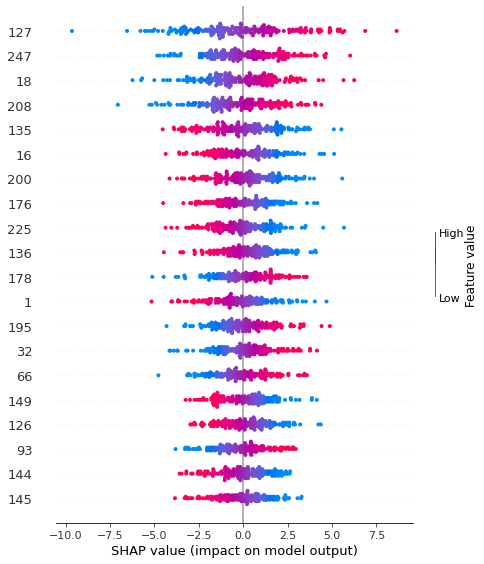

In [ ]:
explainer = shap.LinearExplainer(model, x_train)
shap_value = explainer.shap_values( x_train )
shap.summary_plot( shap_value, x_train )

In [ ]:
from sklearn.feature_selection import RFE
from sklearn import feature_selection

In [ ]:
feature_selector = RFE( model, n_features_to_select=20) # 20개의 변수
feature_selector = feature_selector.fit( x_train, y_train )

In [ ]:
x_train_selected = x_train.loc[:,feature_selector.support_]
x_train_selected.columns # 변수 20개

Index(['16', '18', '32', '47', '63', '66', '126', '127', '133', '136', '144',
       '177', '193', '195', '200', '208', '215', '247', '251', '261'],
      dtype='object')

In [ ]:
x_validation_selected = x_validation.loc[:,feature_selector.support_]
x_validation_selected.columns # 변수 20개

Index(['16', '18', '32', '47', '63', '66', '126', '127', '133', '136', '144',
       '177', '193', '195', '200', '208', '215', '247', '251', '261'],
      dtype='object')

동일한 모델로 선택된 변수만 사용해서 만들어보기

In [ ]:
model = LogisticRegression(penalty='none').fit(x_train_selected,y_train)

In [ ]:
# 예측값 yhat
yhat = model.predict(x_train_selected)
acc = accuracy_score(y_train,yhat)
f1=f1_score(y_train,yhat)
roc=roc_auc_score(y_train,yhat)
print(f'accuracy: {acc}, f1: {f1}, roc: {roc}')

accuracy: 0.955, f1: 0.9142857142857143, roc: 0.9392247465023745


In [ ]:
yhat = model.predict(x_validation_selected)
acc = accuracy_score(y_validation,yhat)
f1=f1_score(y_validation,yhat)
roc=roc_auc_score(y_validation,yhat)
print(f'accuracy: {acc}, f1: {f1}, roc: {roc}')

accuracy: 0.64, f1: 0.35714285714285715, roc: 0.5535714285714285


- 크게 좋아지진 않았지만 약간 좋아지긴 함
- 변수를 많이 사용한다고 해서 모델이 좋아지는 것은 아님을 알 수 있음

## SVC 이용

In [ ]:
model = SVC(kernel='rbf', C=1, gamma=1).fit(x_train_selected,y_train)

In [ ]:
# 예측값 yhat
yhat = model.predict(x_train_selected)
acc = accuracy_score(y_train,yhat)
f1=f1_score(y_train,yhat)
roc=roc_auc_score(y_train,yhat)
print(f'accuracy: {acc}, f1: {f1}, roc: {roc}')


accuracy: 1.0, f1: 1.0, roc: 1.0


In [ ]:
yhat = model.predict(x_validation_selected)
acc = accuracy_score(y_validation,yhat)
f1=f1_score(y_validation,yhat)
roc=roc_auc_score(y_validation,yhat)
print(f'accuracy: {acc}, f1: {f1}, roc: {roc}')

accuracy: 0.72, f1: 0.0, roc: 0.5


- 더 과적합 된 듯
- 정확한 테스트를 위해 파라미터 추정해보기

### 교차 검증
- 학습된 모형의 일반화된 예측을 보기 위함
- 학습과 검증 분할
- but 한 번 분리된 학습과 검증은 변하지 않음
- 이러면 이게 고정이 돼서 절대적인 기준이 됨. 따라서 백프로 믿을 수 없게 됨
- 이를 위해 교차검증을 하게 됨

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = SVC(C=1, gamma=1)
scores = cross_val_score(model, x_train_selected, y_train, cv=10, scoring='accuracy')
print(scores.mean())
print(scores)

0.7350000000000001
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.7  0.7  0.7 ]


K-Fold를 이용한 교차 검증

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold

In [ ]:
kfolds = KFold( n_splits = 5, shuffle=True )
model = SVC( C=1, gamma=1 )
scores = cross_val_score( model, x_train, y_train, cv=kfolds, scoring='accuracy')
print( scores )
print( scores.mean() )

[0.9   0.6   0.7   0.725 0.75 ]
0.7350000000000001


**StratifiedKFold**
- 클래스 별로 균형있게 셋을 만들어줌
- 많이 이용함

In [ ]:
kfolds = StratifiedKFold( n_splits = 5, shuffle=True )
model = SVC( C=1, gamma=1 )
scores = cross_val_score( model, x_train, y_train, cv=kfolds, scoring='accuracy')
print( scores )
print( scores.mean() )

[0.75  0.75  0.725 0.725 0.725]
0.7350000000000001


**RepeatedStarrifiedKFold**
- 미리 분할 안하고 그때그때 반복하면서 셋을 생성
- 속도는 느림

In [ ]:
kfolds = RepeatedStratifiedKFold( n_splits = 5, n_repeats=5 )
model = SVC( C=1, gamma=1 )
scores = cross_val_score( model, x_train, y_train, cv=kfolds, scoring='accuracy')
print( scores )
print( scores.mean() )

[0.75  0.75  0.725 0.725 0.725 0.75  0.75  0.725 0.725 0.725 0.75  0.75
 0.725 0.725 0.725 0.75  0.75  0.725 0.725 0.725 0.75  0.75  0.725 0.725
 0.725]
0.7350000000000001


 파라미터 추정할 때 이 분류모형들을 사용하게 됨.

### 파라미터 추정
- GridSearch가 가장 쉬움
- SVC의 파라미터 추정하기

In [ ]:
from sklearn.model_selection import GridSearchCV
# 교차검증과 함께 파라미터 추정

In [ ]:
params = {
  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}


model = SVC( C=1, gamma=1 )
search = GridSearchCV(model,param_grid=params, scoring='accuracy', cv=10)
results=search.fit(x_train_selected, y_train)

In [ ]:
# 가장 결과가 좋았던 파라미터
print(results.best_params_)
print(results.best_score_)

{'C': 10, 'gamma': 0.01}
0.885


In [ ]:
# 검증 정확도
best_model = results.best_estimator_
yhat = best_model.predict(x_validation_selected)
acc = accuracy_score(y_validation,yhat)
f1=f1_score(y_validation,yhat)
roc=roc_auc_score(y_validation,yhat)
print(f'accuracy: {acc}, f1: {f1}, roc: {roc}')

accuracy: 0.62, f1: 0.3448275862068965, roc: 0.5396825396825398


이 데이터는 일반선형모형이 가장 잘 맞음

### Logistic Regression


In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
kfolds = RepeatedStratifiedKFold( n_splits = 5, n_repeats = 5 )

model = LogisticRegression(class_weight='balanced', solver='liblinear')
feature_selector = RFECV( model, min_features_to_select=20, cv=kfolds)
feature_selector = feature_selector.fit( x_train, y_train )

In [ ]:
x_train_selected = x_train.loc[ :, feature_selector.support_ ]
x_train_selected.columns

Index(['1', '3', '4', '5', '8', '16', '17', '18', '22', '24',
       ...
       '269', '271', '272', '276', '277', '278', '283', '291', '292', '294'],
      dtype='object', length=109)

In [ ]:
x_validation_selected = x_validation.loc[ :, feature_selector.support_ ]
x_validation_selected.columns

Index(['1', '3', '4', '5', '8', '16', '17', '18', '22', '24',
       ...
       '269', '271', '272', '276', '277', '278', '283', '291', '292', '294'],
      dtype='object', length=109)

In [ ]:
kfolds = RepeatedStratifiedKFold( n_splits = 5, n_repeats = 5 )

params = {
  'penalty': ['l1', 'l2'],
  'C': [ 0.001, 0.01, 0.1, 1, 10, 100, 1000 ],
  'class_weight': ['balanced', None],
}

model = LogisticRegression(solver='liblinear')
search = GridSearchCV( model, param_grid=params, scoring='roc_auc', cv=kfolds)
results = search.fit( x_train_selected, y_train )

In [ ]:
print( results.best_params_ )
print( results.best_score_ )

{'C': 1000, 'class_weight': 'balanced', 'penalty': 'l2'}
0.9962842215256009


In [ ]:
best_model = results.best_estimator_
yhat = best_model.predict(x_validation_selected )
acc = accuracy_score( y_validation, yhat )
f1 = f1_score( y_validation, yhat )
roc = roc_auc_score( y_validation, yhat )
print( f'accuracy: {acc}, f1: {f1}, roc: {roc}')

accuracy: 0.54, f1: 0.30303030303030304, roc: 0.4841269841269842


자료의 수가 너무 적고 불균형이 심하기 때문에 알고리즘 만으로는 해결하기 어려움

# SVR (Support Vector Regression)

In [3]:
np.random.seed(123)
x = np.linspace(-1, 1, 100)
y = x ** 2 + 1.5 * x + 0.5 * (2 * np.random.rand(len(x))-1)

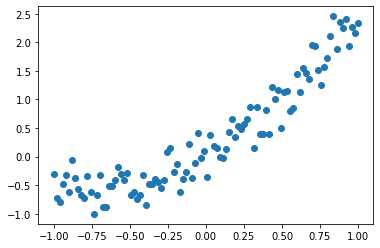

In [4]:
plt.plot( x, y, 'o')

가우시안 커널(RBF) 이용
- c, gamma 추정
- 커질 수록 과적합

In [7]:
model = SVR(C=1000, gamma=1000).fit(x.reshape(-1,1),y)

In [10]:
model.score(x.reshape(-1,1),y) # 정확도

0.9899827980477481

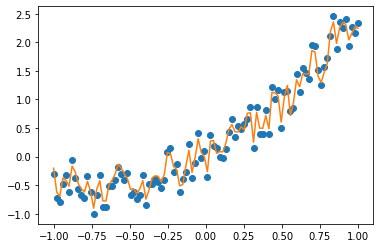

In [9]:
plt.plot( x, y, 'o')
plt.plot(x,model.predict(x.reshape(-1,1)))
plt.show()
# 과적합

## 과적합
- 적절한 C, gamma 찾기
- GridSearch 사용

In [12]:
params = {
  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}


model = SVR()
search = GridSearchCV( model, param_grid=params, scoring='r2', cv=10) # 가장 일반적인 모형의 파라미터 알려줌
results = search.fit( x.reshape(-1,1), y )

In [14]:
print(results.best_params_)
print(results.best_score_) # r square 값

{'C': 100, 'gamma': 0.1}
-0.2214765441717212


In [19]:
yhat = best_model.predict( x.reshape(-1,1) )
print( r2_score(y, yhat) )
print( mean_squared_error(y, yhat)) # 평균오차
print( mean_absolute_error(y, yhat))

0.9338938567126988
0.0599483731302058
0.20156939603261215


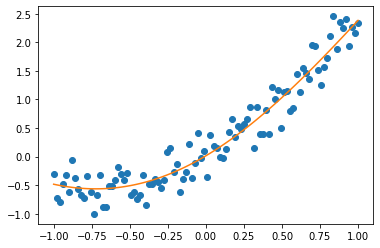

In [16]:
best_model = results.best_estimator_

plt.plot( x, y, 'o')
plt.plot( x, best_model.predict( x.reshape(-1,1)))
plt.show()

## 캘리포니아 집값 예측

In [20]:
train = pd.read_csv('/content/sample_data/california_housing_train.csv')
validation = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [21]:
train_features = train.drop( columns=['median_house_value', 'longitude', 'latitude'])
train_target = train['median_house_value']
validation_features = validation.drop( columns=['median_house_value', 'longitude', 'latitude'])
validation_target = validation['median_house_value']

In [22]:
kfolds=KFold(n_splits=10, shuffle=True) # 교차 셋

In [23]:
params = {
  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}


model = SVR()
search = GridSearchCV( model, param_grid=params, scoring='r2', cv=kfolds) # 가장 일반적인 모형의 파라미터 알려줌
results = search.fit(train_features, train_target )

In [ ]:
print( results.best_params_ )
best_model = results.best_estimator_

{'C': 1000, 'gamma': 0.001}


### 학습정확도

In [ ]:
yhat = best_model.predict( train_features )
r2 = r2_score( train_target, yhat )
mse = mean_squared_error( train_target, yhat )
mae = mean_absolute_error( train_target, yhat )
print( f'r2: {r2}, mse: {mse}, mae: {mae}')

r2: -0.03585760370001401, mse: 13933778780.525063, mae: 87570.4843093413


### 검증 정확도

In [ ]:
yhat = best_model.predict( validation_features )
r2 = r2_score( validation_target, yhat )
mse = mean_squared_error( validation_target, yhat )
mae = mean_absolute_error( validation_target, yhat )
print( f'r2: {r2}, mse: {mse}, mae: {mae}')

r2: -0.04625104181710005, mse: 13383432338.543594, mae: 86402.60994050592


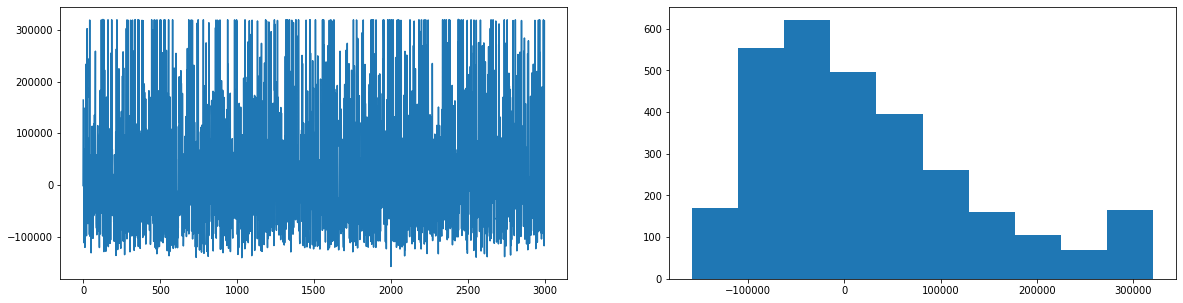

In [ ]:
residual = validation_target - yhat

plt.figure( figsize=(20, 5) )

plt.subplot( 1, 2, 1)
plt.plot( residual )

plt.subplot( 1, 2, 2)
plt.hist( residual )

plt.show()

- 결과값이 그렇게 좋지는 않은듯
- 일부 변수만 사용해서 다시 해봄

## 일부 변수만 사용

In [ ]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
train_features = train.drop( columns=['median_house_value', 'longitude', 'latitude', 'total_rooms', 'housing_median_age'])
train_target = train['median_house_value']
validation_features = validation.drop( columns=['median_house_value', 'longitude', 'latitude', 'total_rooms', 'housing_median_age'])
validation_target = validation['median_house_value']

In [ ]:
train_features

,total_bedrooms,population,households,median_income
0,1283.0,1015.0,472.0,1.4936
1,1901.0,1129.0,463.0,1.8200
2,174.0,333.0,117.0,1.6509
3,337.0,515.0,226.0,3.1917
4,326.0,624.0,262.0,1.9250
...,...,...,...,...
16995,394.0,907.0,369.0,2.3571
16996,528.0,1194.0,465.0,2.5179
16997,531.0,1244.0,456.0,3.0313
16998,552.0,1298.0,478.0,1.9797


### 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform( train_features )
train_features_scaled

array([[ 1.76420407, -0.36118401, -0.07599796, -1.25254316],
       [ 3.23044127, -0.26186523, -0.09940441, -1.08148298],
       [-0.86695622, -0.95535424, -0.99925206, -1.17010515],
       ...,
       [-0.01995512, -0.16167524, -0.11760942, -0.44666313],
       [ 0.02986848, -0.1146295 , -0.06039367, -0.99778717],
       [-0.56801465, -0.54326844, -0.60134255, -0.45536288]])

검증 자료도 동일하게 스케일링을 해줍니다.

In [ ]:
validation_features_scaled = scaler.fit_transform( validation_features )
validation_features_scaled

array([[ 0.31533695,  0.13024561,  0.31773437,  1.51074547],
       [-0.52925544, -0.57629585, -0.58274291, -0.11232419],
       [-0.05522495,  0.07880784,  0.01392592,  1.0711495 ],
       ...,
       [-0.79153626, -0.68887663, -0.73875265, -0.81855768],
       [-1.24150429, -1.31680565, -1.30257733, -0.2893275 ],
       [-0.642349  , -0.63064519, -0.62927213,  2.56365089]])

In [ ]:
params = {
  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

model = SVR()
search = GridSearchCV( model, param_grid=params, scoring='r2', cv=kfolds)
results = search.fit( train_features_scaled, train_target )

In [ ]:
print( results.best_params_ )
best_model = results.best_estimator_

{'C': 1000, 'gamma': 0.1}


### 학습정확도

In [ ]:
yhat = best_model.predict( train_features_scaled )
r2 = r2_score( train_target, yhat )
mse = mean_squared_error( train_target, yhat )
mae = mean_absolute_error( train_target, yhat )
print( f'r2: {r2}, mse: {mse}, mae: {mae}')

r2: 0.519041096360758, mse: 6469590937.881319, mae: 58408.18554213965


### 검증정확도

In [ ]:
yhat = best_model.predict( validation_features_scaled )
r2 = r2_score( validation_target, yhat )
mse = mean_squared_error( validation_target, yhat )
mae = mean_absolute_error( validation_target, yhat )
print( f'r2: {r2}, mse: {mse}, mae: {mae}')

r2: 0.49853576312828096, mse: 6414629392.116089, mae: 58215.120186379936


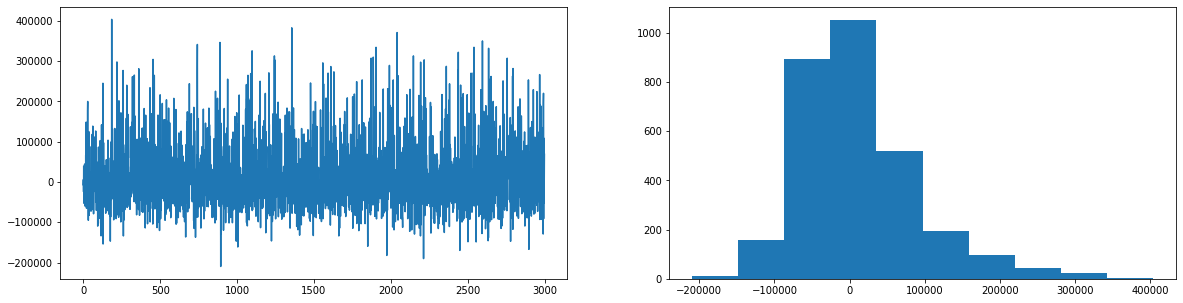

In [ ]:
residual = validation_target - yhat

plt.figure( figsize=(20, 5) )

plt.subplot( 1, 2, 1)
plt.plot( residual )

plt.subplot( 1, 2, 2)
plt.hist( residual )

plt.show()